In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer #Imputer to handle missing values
from pylab import *
%matplotlib inline

In [2]:
data = pd.read_excel("pima-indians-diabetes.xlsx") #Importing the data file

In [3]:
data.shape #checking the shape of data

(768, 9)

In [4]:
data.groupby('Class Variable').size()

Class Variable
0    500
1    268
dtype: int64

Although the ratio of output class is almost 2:1, lets conclude we have sufficient data of diabetic and non-diabetic patients

In [5]:
data.head(11) #viewing the first 5 rows

,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age,Class Variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.info() #displaying the coloum Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnant        768 non-null    int64  
 1   Plasma glucose  768 non-null    int64  
 2   BP              768 non-null    int64  
 3   Triceps         768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   Age             768 non-null    int64  
 8   Class Variable  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe() #displaying basic details about each columns

,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age,Class Variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here we see, the min value as '0' for alsmost all the columns, so it can be an outlier or missin values. we will analyse this further.

Pregnant             AxesSubplot(0.125,0.657941;0.227941x0.222059)
Plasma glucose    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Triceps              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin           AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DPF                     AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class Variable       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

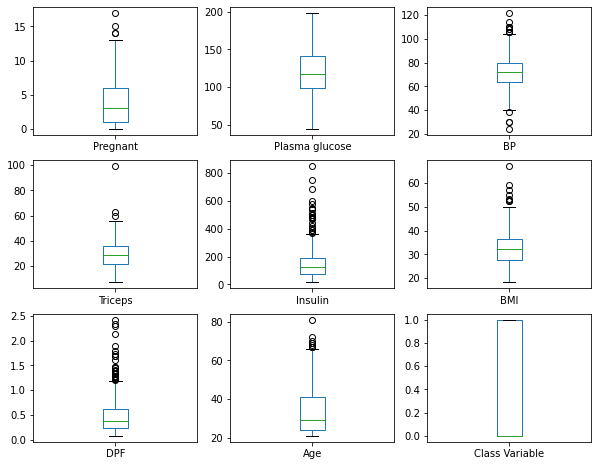

In [8]:
#replacing the missing values 0's with NaN for easier computation
cols_missing_vals =['Plasma glucose', 'BP', 'Triceps', 'Insulin', 'BMI'] # columns 'Pregnant' can have 0 values
data[cols_missing_vals] = data[cols_missing_vals].replace(0,np.NaN)

#Displaying the boxplot to see the ourliers and percentiles graphically
data.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(10,8))

Here, we see lots of outliers in almost all of the data. The next data cleaning processes are handling missing values and outliers.

### Handling Missing values (In our case zeros might be representing missing values)


In [9]:
#displaying the number of missing values in each columns
data.isnull().sum()

Pregnant            0
Plasma glucose      5
BP                 35
Triceps           227
Insulin           374
BMI                11
DPF                 0
Age                 0
Class Variable      0
dtype: int64

Here, we see many missing values are there. Removing the rows containing missing values is not a good idea here as there are lots of rows. We have differenct ways to replace the missing values like imputing with mean/median/mode or regresive imputing, updating with missing space forward/backward fill,predictive modelling etc.
Just to see how the features distribution behave lets see the differenct approaches.
["Plasma glucose","BP","Triceps","Insulin","BMI"] cannot be zero in reality because these are the alway present in body atleaset in some quantity.

In [10]:
print('for target variable 0')
print((data.loc[data['Class Variable']==0]).isnull().sum())
print('for target variable 1')
print((data.loc[data['Class Variable']==1]).isnull().sum())


'''printing tricep and insulin'''
print(data.loc[(data['Triceps'].isnull()) & (data['Insulin'].isnull())].shape)
'''printing bp, insulin'''
print(data.loc[(data.BP.isnull()) & (data.Insulin.isnull())].shape)
'''printing bp,tricep,insulin '''
print(data.loc[(data.BP.isnull()) &(data.Triceps.isnull()) & (data.Insulin.isnull())].shape)
'''printing glucose'''
print(data.loc[data['Plasma glucose'].isnull()].shape)
'''printing bmi'''
data.loc[data['BP'].isnull()]
#data.loc[data['Triceps'].isnull()]
#data.loc[data['Insulin'].isnull()]


for target variable 0
Pregnant            0
Plasma glucose      3
BP                 19
Triceps           139
Insulin           236
BMI                 9
DPF                 0
Age                 0
Class Variable      0
dtype: int64
for target variable 1
Pregnant            0
Plasma glucose      2
BP                 16
Triceps            88
Insulin           138
BMI                 2
DPF                 0
Age                 0
Class Variable      0
dtype: int64
(227, 9)
(35, 9)
(33, 9)
(5, 9)


,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age,Class Variable
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


By looking at the the missing values occurances in BP,Triceps and Inuling, we see that there is a pattern exist. It looks like the Insulin and Triceps values are also kepy blank whenever BP is gone missing. In the same way Insuing is also likly to be missing whenever Triceps is missing.

In [11]:
#Method to return a dataframe with original value ,Zeros replaced with mean,zeros replaced with median,zeros replaced with mode 
def do_Imputation(col):
    col_data = pd.DataFrame(data[col])
    col_data[col+"_mean"] = col_data[col]
    col_data[col+"_median"] = col_data[col]
    col_data[col+"_mode"] = col_data[col]
    indices_1 = data.loc[(data["Class Variable"]==1) & (data[col].apply(np.isnan)),[col]].index
    indices_0 = data.loc[(data["Class Variable"]==0) & (data[col].apply(np.isnan)),[col]].index
    #to calculate mean
    mean_1 = data.loc[(data['Class Variable']==1)][col].mean()
    mean_0 = data.loc[(data['Class Variable']==0)][col].mean()
    #print(mean_1,mean_0)
    col_data.loc[indices_1,col+"_mean"]=mean_1
    col_data.loc[indices_0,col+"_mean"] = mean_0
    #to calculate median
    median_1 = data.loc[(data['Class Variable']==1)][col].median()
    median_0 = data.loc[(data['Class Variable']==0)][col].median()
    col_data.loc[indices_1,col+"_median"]=median_1
    col_data.loc[indices_0,col+"_median"] = median_0
    #print(median_1,median_0)
    #to calculate mode
    mode_1 = data.loc[(data['Class Variable']==1)][col].mode()
    mode_0 = data.loc[(data['Class Variable']==0)][col].mode()
    col_data.loc[indices_1,col+"_mode"]=mode_1[0]
    col_data.loc[indices_0,col+"_mode"] = mode_0[0]
    #print(mode_1[0],mode_0[0])
    #df['BloodPressure']=df.BloodPressure.mask((df.BloodPressure == 0),mean_bp)
    #df["BloodPressure"] = df["BloodPressure"].astype(float).astype(int)
    return col_data
    

In [12]:
# this methode will do Linear discriminant analysis on data_cp(copy of original data) and return the accuracy score of the model
def compare_Imputation():
    # split dataset into inputs and outputs
    X = data_cp.iloc[:,0:8]
    y = data_cp.iloc[:,8]
    # define the imputer
    #imputer = SimpleImputer(missing_values=nan, strategy='mean')
    # define the modeling pipeline
    #pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])

    # define the cross validation procedure
    kfold = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    lda = LinearDiscriminantAnalysis()
    # evaluate the model
    result = cross_val_score(lda, X, y, cv=kfold, scoring='accuracy')
    # report the mean performance
    return result.mean()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold,cross_val_score
#Here we are Imputing the dataset with mean,median and mode and then displaying the accuracy in each of it
data_cp = data.copy()
for m in ["_mean","_median","_mode"]:
    for i in cols_missing_vals:
        data_cp[i] = do_Imputation(i).loc[:,i+m]
    print("Accuracy{0} :{1}".format(m,compare_Imputation()))



Accuracy_mean :0.7760416666666666
Accuracy_median :0.76953125
Accuracy_mode :0.765625


We can observe a slight increase in the accuracy while using mean. So we are going to finalyse our Imputation based on mean

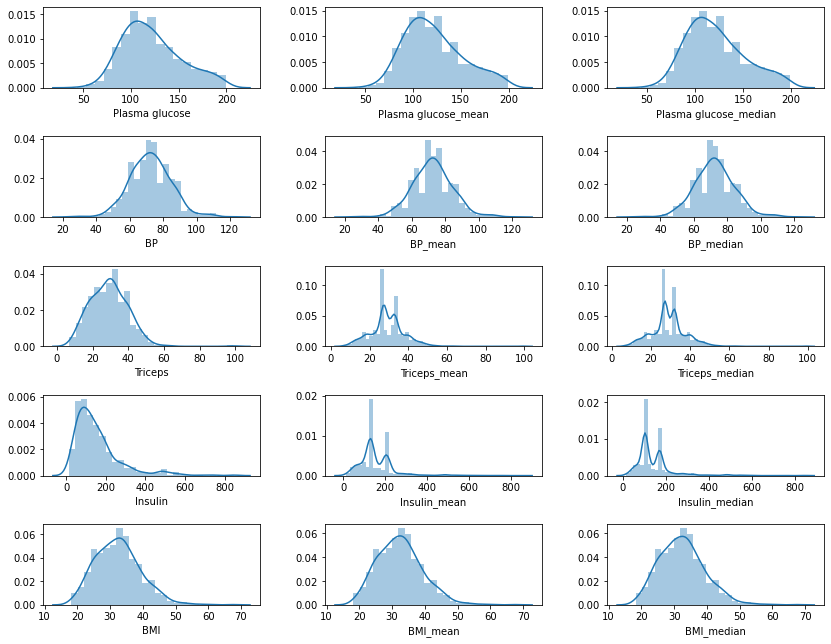

In [14]:
#Replacing the missing values(zero) with mean and median and plottind the kde to see how the distribution changes
fig,ax=plt.subplots(5,3,figsize=(14,11))
plt.subplots_adjust(wspace=.3,hspace=.6)
for i,val in enumerate(cols_missing_vals):
    imputed_data = do_Imputation(val)
    sns.distplot(imputed_data[val],ax=ax[i][0])
    sns.distplot(imputed_data[val+"_mean"],ax=ax[i][1])
    sns.distplot(imputed_data[val+"_median"],ax=ax[i][2])

In [15]:
#Replacing the missing values with their mean as Imputation with mean gives the best accuracy
for i in cols_missing_vals:
        data[i] = do_Imputation(i).loc[:,i+"_mean"]
data.isnull().sum()# making sure there are no null values

Pregnant          0
Plasma glucose    0
BP                0
Triceps           0
Insulin           0
BMI               0
DPF               0
Age               0
Class Variable    0
dtype: int64

In [16]:
data.describe()

,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age,Class Variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [17]:
#EDA using Pandas Profiling
#from pandas_profiling import ProfileReport
#dt=data.copy()
#profile = ProfileReport(dt)
#profile.to_file("_report.html")
#profile

### Outlier Detection and correction

In [18]:
def outlier_treatment(col):
    Q1,Q3 = np.percentile(data[col] , [25,75]) 
    print(Q1,Q3)
    IQR = Q3-Q1
    #print(IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    #print(lower_range,upper_range)
    #print(col_data[col_data[col]>100])
    data.loc[data[col]>upper_range,col] = upper_range
    data.loc[data[col]<lower_range,col] = lower_range
    
#cols_with_outliers = ["Pregnant","Triceps","Insulin","BMI","DPF","BP"] #cols that might have outliers
#for col in cols_with_outliers:
#    outlier_treatment(col)
#data.describe()
#data.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(10,8))

We will be using the Random Forest and XGB algorithms for our modelling.Here, we are skipping the outlier treatment part as our chosen algorithms are not really biased to outliers. Also, at the same time, some of our data need not to cosider as outliers even if it comes as outliers in box plot. For e.g. we have age as 80+ which shows as outliers but clearly it is a possible value for age feature. Hence, we are skipping the outler part for now. 

## Statistical Analysis - Descriptive

In [19]:
data.describe() #Displaying descriptive statistical data such as mean,median, percentile, standard deviation etc...

,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age,Class Variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB64ABF888>,
      dtype=object)

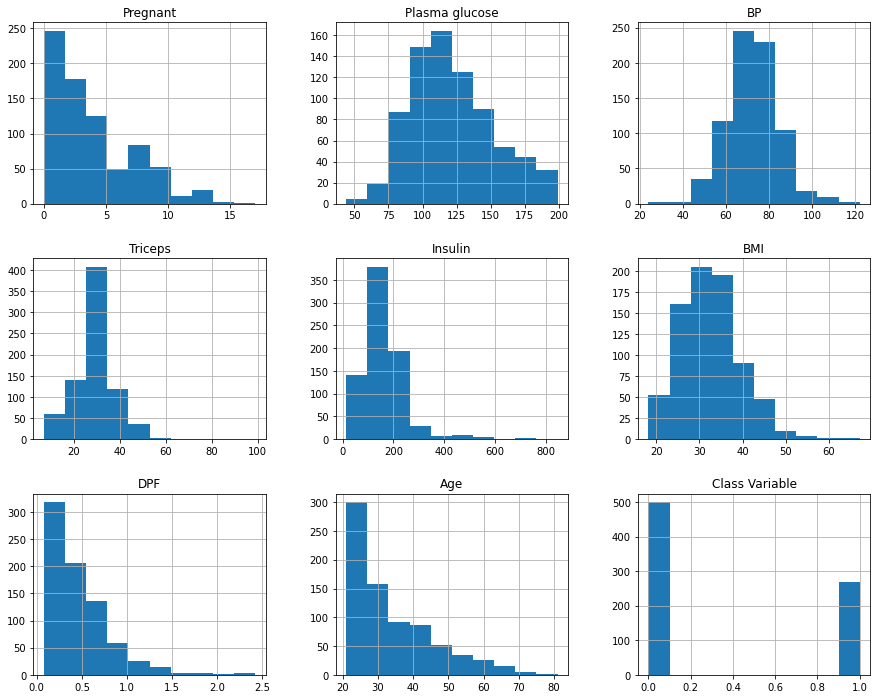

In [20]:
#to display histogram of each variable
#data.hist(figsize=(15, 12),density=True, histtype='step',
#                           cumulative=True)
data.hist(figsize=(15, 12))

In [21]:
data.groupby('Class Variable').size() #Getting the exact number of diabetic and non-diabetic

Class Variable
0    500
1    268
dtype: int64

In [22]:
#If we want to see the outcome, according to the age, then we can make a stacked bar graph
#data.groupby(['Age','Class Variable']).size().unstack().plot(kind='barh',
#           figsize=(20,20), stacked=True)

In [23]:
#Now, we will separate the data based on the class and compare classwise
diabetic = data[data['Class Variable']==1]
non_diabetic = data[data['Class Variable']==0]

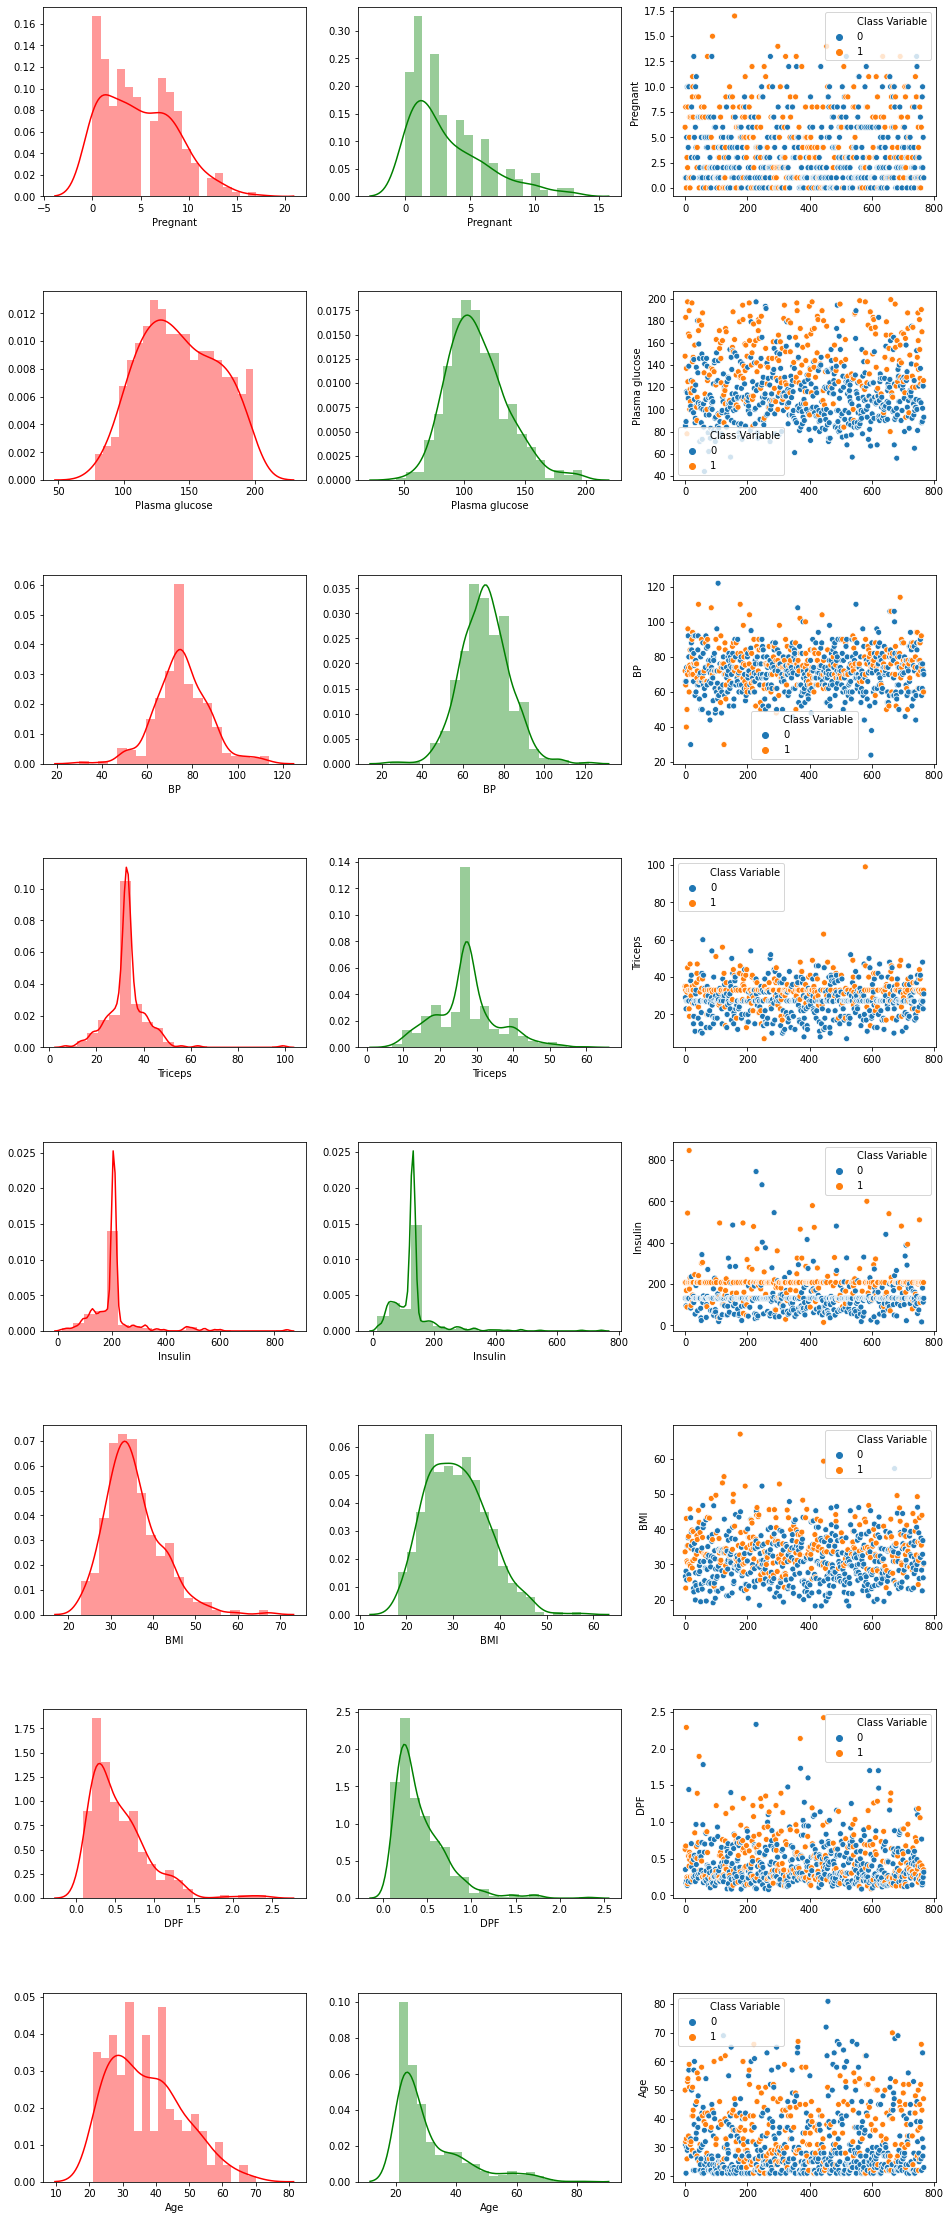

In [24]:
fig,ax=plt.subplots(8,3,figsize=(16,40))
plt.subplots_adjust(wspace=.2,hspace=.5)
X_columns = ['Pregnant', 'Plasma glucose', 'BP', 'Triceps', 'Insulin', 'BMI', 'DPF','Age']
for i,val in enumerate(X_columns):
    sns.distplot(diabetic[val],ax=ax[i][0],bins = 20,kde=True,color = "r")
    sns.distplot(non_diabetic[val],ax=ax[i][1],bins=20,kde=True, color = 'g')
    sns.scatterplot(x=data.index,y= val , hue="Class Variable",data= data,ax = ax[i][2])

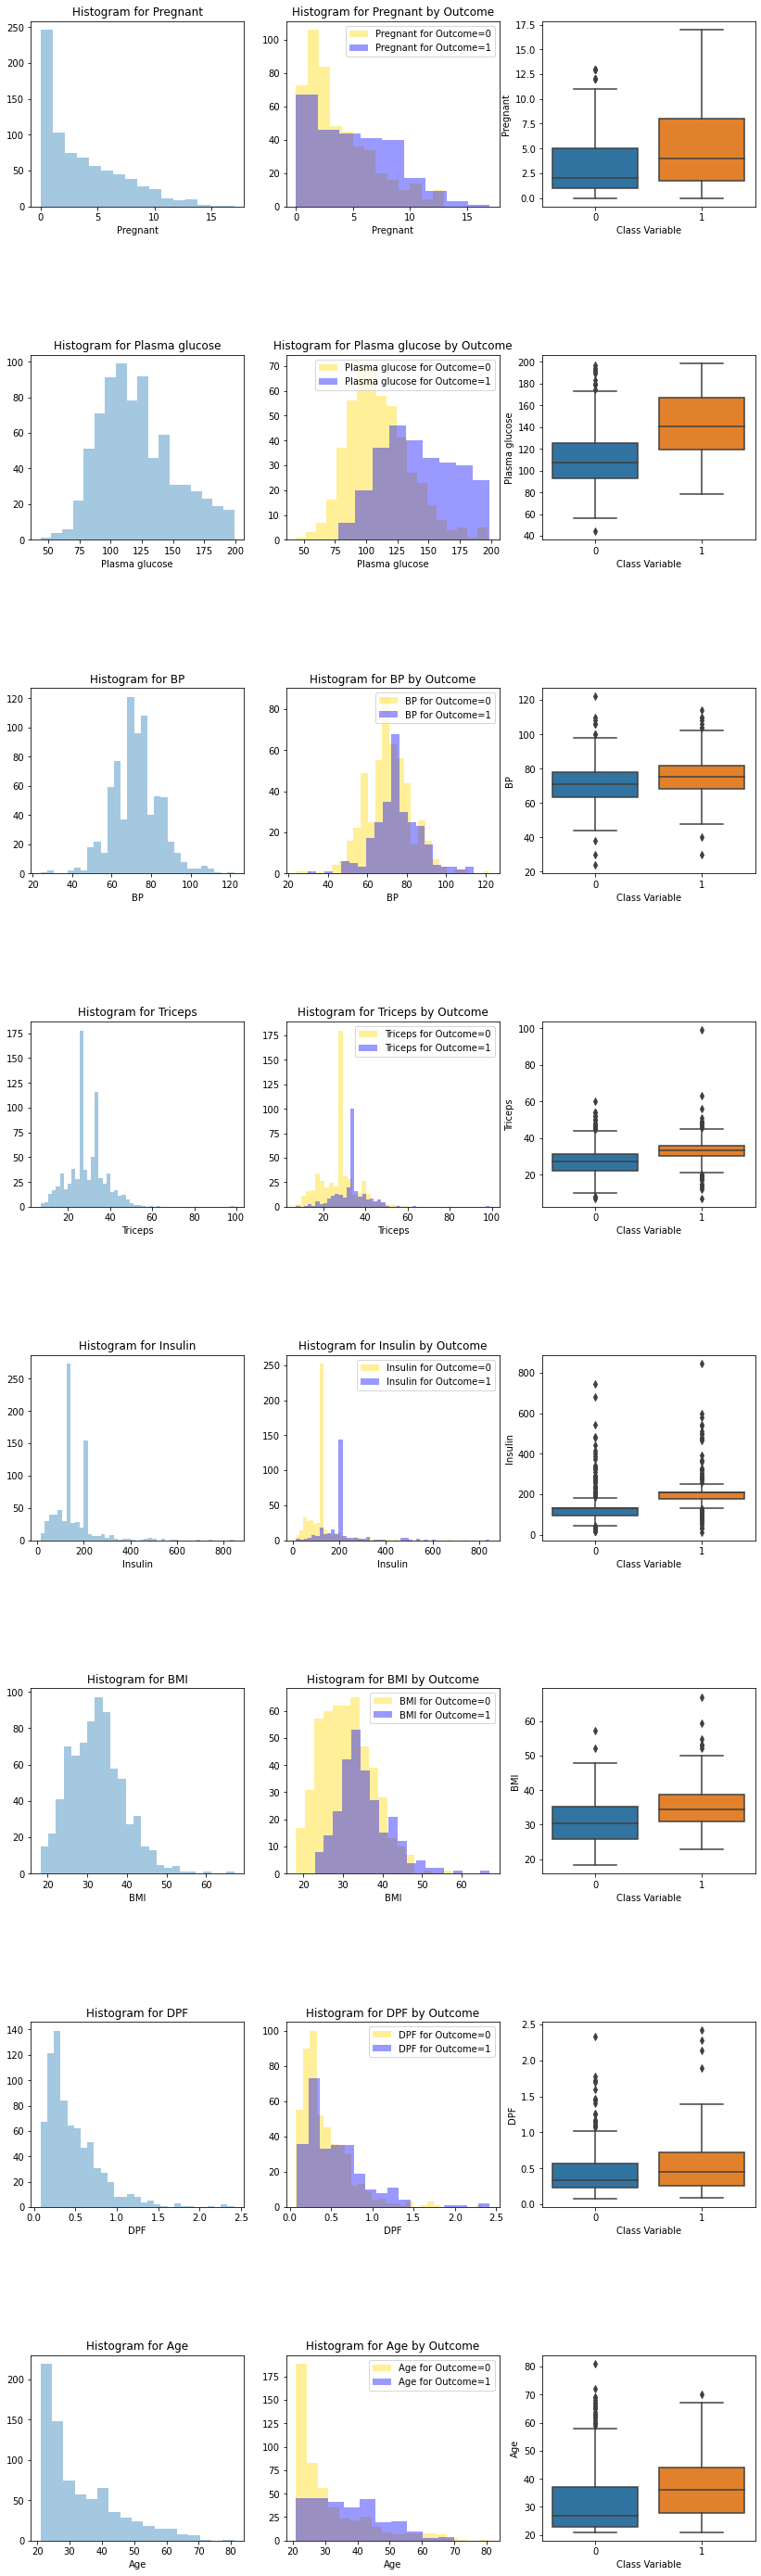

In [25]:
#We are just going to plot the histograms bit differently to see if any other patters can be inferred
fig, ax = plt.subplots(8,3,figsize=(14, 50))
plt.subplots_adjust(hspace=.8)
for i,val in enumerate(X_columns):
    sns.distplot(data[val],kde=False,ax=ax[i][0])
    ax[i][0].set_title("Histogram for "+val)
    sns.distplot(non_diabetic[val],kde=False,color="Gold", label=val+" for Outcome=0", ax=ax[i][1])
    sns.distplot(diabetic[val],kde=False, color="Blue", label=val+" for Outcome=1", ax=ax[i][1])
    ax[i][1].legend()
    ax[i][1].set_title("Histogram for "+val+" by Outcome")
    sns.boxplot(x=data["Class Variable"],y=data[val],ax = ax[i][2])
    #ax[i][2].set_title("Boxplot for "+val+" by Outcome")

In [26]:
#age_col = data["Age"].astype(str).astype(int)

age_data = []

age_data.append((data.loc[(data.Age>=21) & (data.Age<=24) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=25) & (data.Age<=30) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=31) & (data.Age<=35) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=36) & (data.Age<=40) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=41) & (data.Age<=45) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=46) & (data.Age<=50) & (data['Class Variable']==1)]['Age'].count()))
age_data.append((data.loc[(data.Age>=51) & (data.Age<=55) & (data['Class Variable']==1)]['Age'].count()))
age_data

[31, 59, 41, 35, 44, 20, 21]

by just taking the count of number of diabetes, we could see the most number of diabetes cases are between the age 41-45. Actually, histogram also supports this

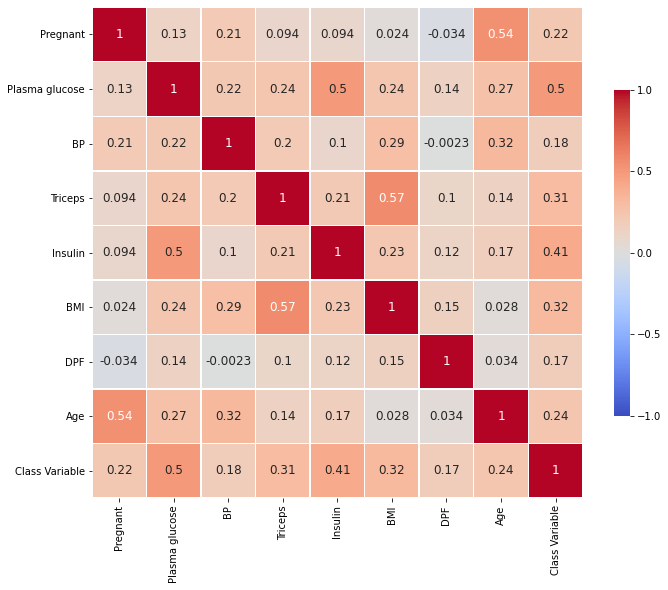

In [27]:
#Displaying heatmap of correlation between variables
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(data.corr(), 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(data.corr().columns, rotation = 0)
ax.set_xticklabels(data.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [28]:
#Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.
data.skew()

Pregnant          0.901674
Plasma glucose    0.530932
BP                0.131514
Triceps           0.761818
Insulin           2.622728
BMI               0.602144
DPF               1.919911
Age               1.129597
Class Variable    0.635017
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew

Pregnant             AxesSubplot(0.125,0.657941;0.227941x0.222059)
Plasma glucose    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Triceps              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin           AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DPF                     AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class Variable       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

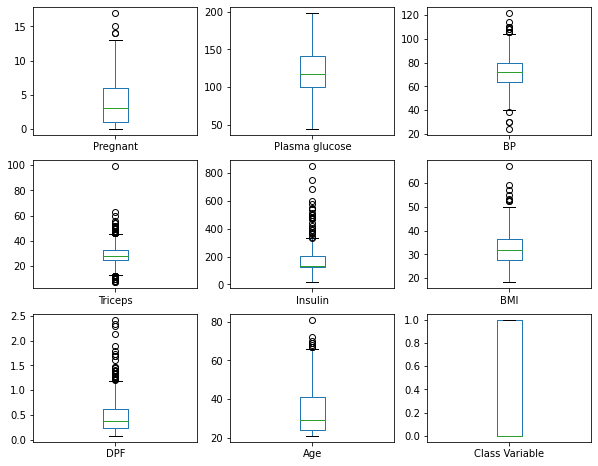

In [29]:
#Data dispertion using percentiles
data.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(10,8))

From box plot we can see the Q1, Q3 and outliers etc. There are many outliers in Triceps,Insulin,BP,DPF

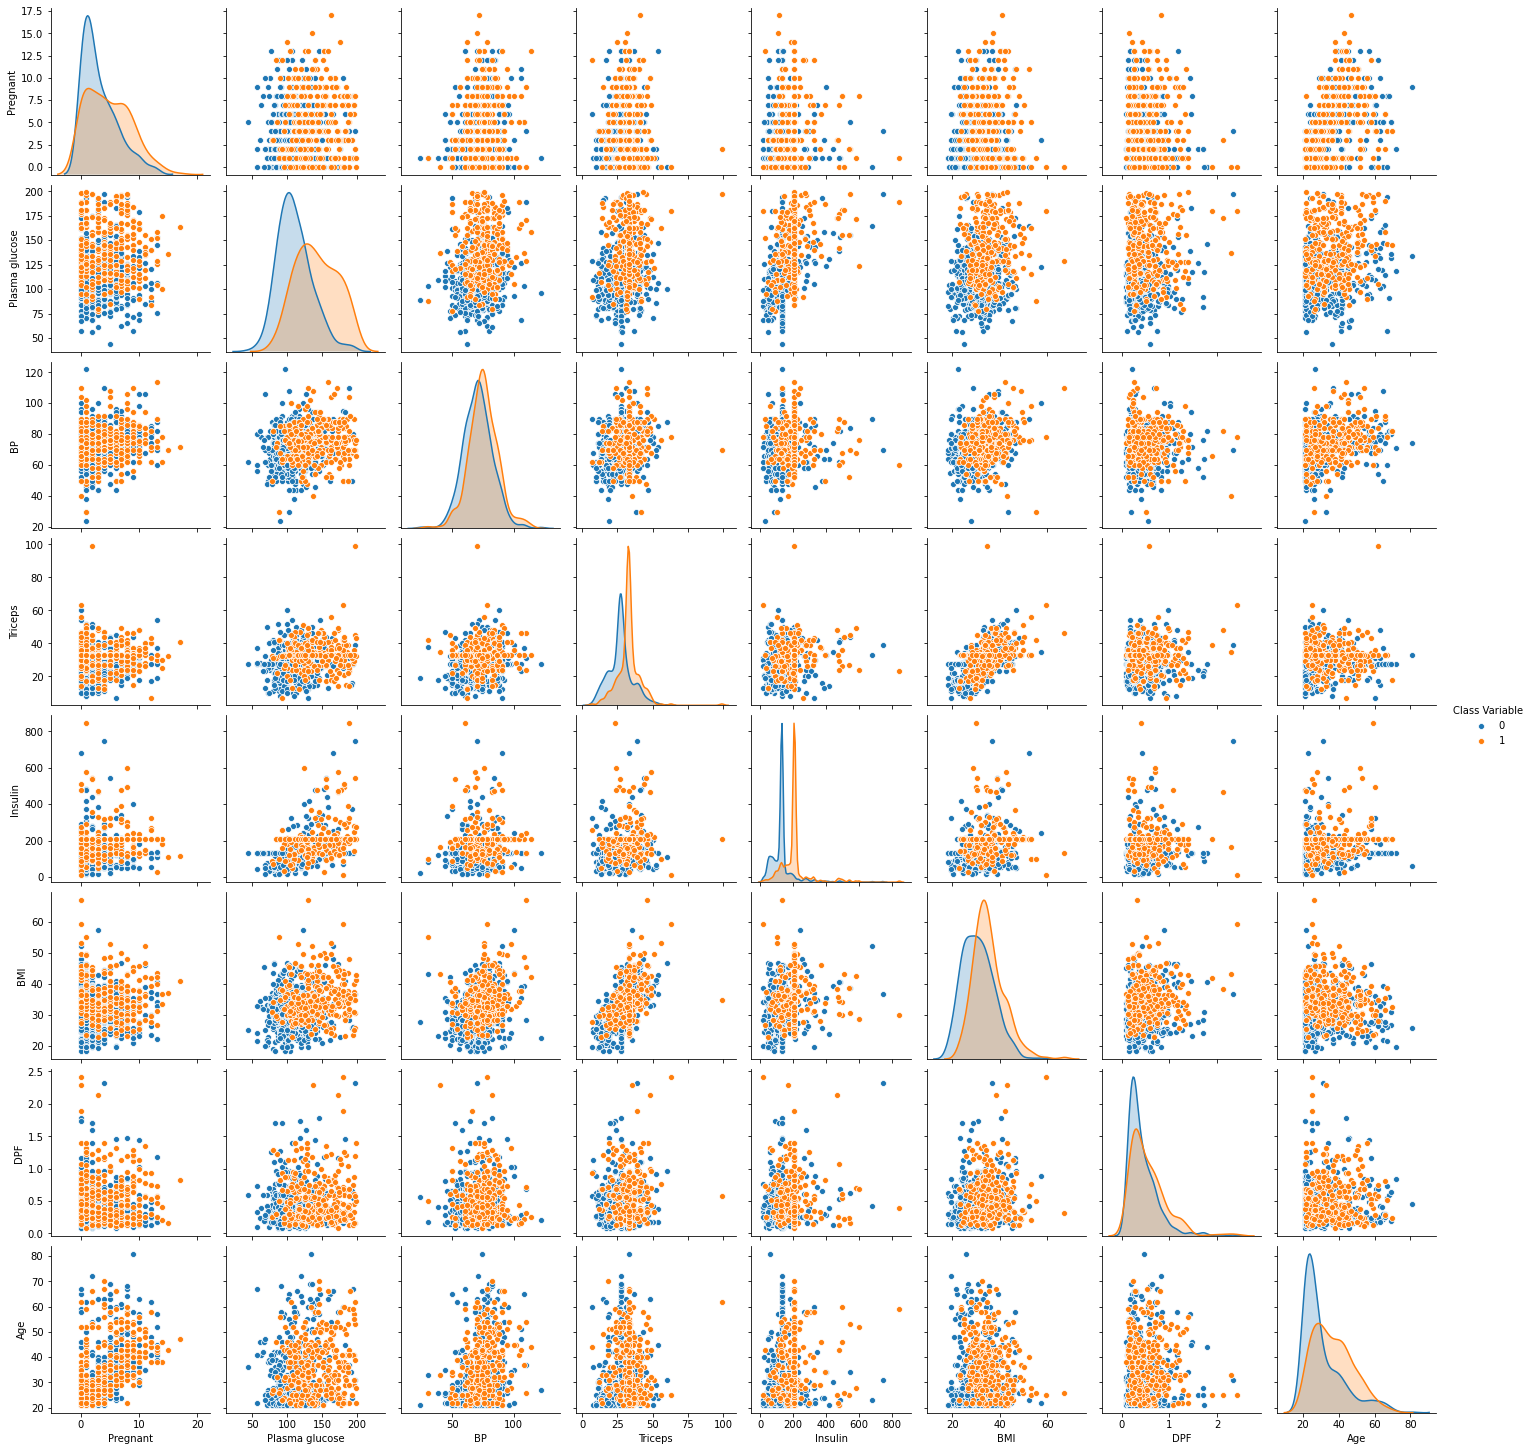

In [30]:
sns.pairplot(data,hue ="Class Variable") # Displaying the relation between two variables with hue as Class var

### Inferential Stats

In [31]:
df = data.copy() #copying the original data into df for computations
df["Class Variable"].replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(df["Class Variable"].value_counts())

Non-Diab    500
Diab        268
Name: Class Variable, dtype: int64


In [32]:
## importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(df["Pregnant"]).pvalue
GlucosePVAL=stats.normaltest(df["Plasma glucose"]).pvalue
BloodPressurePVAL=stats.normaltest(df.BP).pvalue
SkinThicknessPVAL=stats.normaltest(df.Triceps).pvalue
InsulinPVAL=stats.normaltest(df.Insulin).pvalue
BMIPVAL=stats.normaltest(df.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(df.DPF).pvalue
AgePVAL=stats.normaltest(df.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 2.0864854132514455e-08
BloodPressure P Value is 3.8593326078391164e-05
Skin Thickness P Value is 2.1030578385234067e-33
Insulin P Value is 1.4469863006285418e-103
BMI P Value is 1.1829518169945333e-12
Diabetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236578e-27


So, in all the cases we can see the distribution is not normal because p-values<0.05.

We will see later how do we check normality using Q-Q plot, convert a distribution to normal and then again try doing the hypothesis tests below. For now, Lets just assume that our features are normally distributed

In [33]:
import statsmodels.api as sm
n = df.shape[0]
diabetic = df["Class Variable"].value_counts().loc['Diab']
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(diabetic, n),"\n")


95% Confidence interval with statsmodels library ==> (0.3152483405027714, 0.38266832616389523) 



With 95% confidence, we can say the population proportion of people having diabetes is estimated to be between 31.52% - 38.26%.

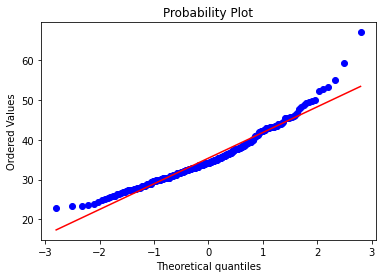

In [34]:
df_diabetic = df[df["Class Variable"]=='Diab']
stats.probplot(df_diabetic['BMI'], dist="norm",plot=plt) #QQ plot for normality checking
plt.show()

In [35]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_BMI = np.array(df_diabetic['BMI']).reshape(-1,1)
#norm_BMI = pd.DataFrame(scaler.fit_transform(df_BMI))
#stats.probplot(norm_BMI[0], dist="norm",plot=plt) #QQ plot for normality checking
#plt.show()

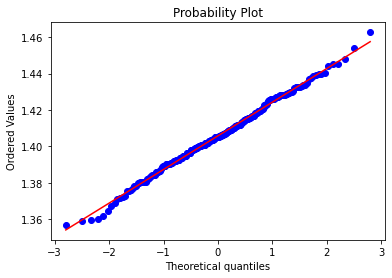

In [36]:
#Using boxcox to normalise the data
result, lmbda = stats.boxcox(df_diabetic['BMI'])
stats.probplot(result, dist="norm",plot=plt) #QQ plot for normality checking
plt.show()
def invert_boxcox(value, lam):
    # log case
    if lam == 0:
        return exp(value)
    # all other cases
    return exp(log(lam * value + 1) / lam)

In [37]:
#When using non normalised data C.I is (34.617767483708725, 36.19576635087774)
lb = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[0],lmbda)
ub = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[1],lmbda)
print("\n95% C.I. with statsmodels library ==>",lb,'to',ub)


95% C.I. with statsmodels library ==> 33.78144998821263 to 35.23024886020549


With 95% confidence, the population mean BMI for all Patients with Diabetes is estimated to be between 33.78  to 35.23 times.

In [38]:
df_non_diabetic = df[df['Class Variable']=='Non-Diab']
#Using boxcox to normalise the data
result_nd, lmbda_nd = stats.boxcox(df_non_diabetic['BMI'])
#stats.probplot(result_nd, dist="norm",plot=plt) #QQ plot for normality checking
#plt.show()
lb = invert_boxcox(sm.stats.DescrStatsW(result_nd).zconfint_mean()[0],lmbda_nd)
ub = invert_boxcox(sm.stats.DescrStatsW(result_nd).zconfint_mean()[1],lmbda_nd)
print("\n95% C.I. with statsmodels library ==>",lb,'to',ub)


95% C.I. with statsmodels library ==> 29.675790099476973 to 30.789653898405447


With 95% confidence, the population mean of BMI for all non diabetic Patients is estimated to be between 29.67 to 30.78

In [39]:
z,p_value = sm.stats.ztest(df_diabetic['BMI'],df_non_diabetic['BMI'])

print("P-Value is ==> ",p_value)

P-Value is ==>  3.76454820493012e-20


Our p-value is smaller than the 0.05 significance level, which means there is strong evidence against the null.

Thus, we reject the null!

Based on our estimated difference in sample means, we support that there is a significant difference between the population mean BMI for diabetic and non diabetic patients.



In [40]:
z,p_value = sm.stats.ztest(df_diabetic['Plasma glucose'],df_non_diabetic['Plasma glucose'])

print("P-Value is ==> ",p_value)

P-Value is ==>  2.7642491339344484e-56


Here, p_value<0.05 so, We can reject Null hypothesis. ie. There is difference in the Glucose's mean in diabetic and non-diabetic patients

In [41]:
df_diabetic['Plasma glucose'].mean() # displaying the mean using pandas

142.31954887218043

In [42]:
# here we will be using bootstrap method for calculating population mean
import random

sample_mean = []
# Bootstrap Sampling
for i in range(1000):
    y = random.sample(df_diabetic['Plasma glucose'].tolist(), 50)
    avg = np.mean(y)
    sample_mean.append(avg)
print("Mean of Glucose for Diabetic patients:",np.mean(sample_mean))
# here we will be using bootstrap method for calculating population mean
import random

sample_mean = []
# Bootstrap Sampling
for i in range(1000):
    y = random.sample(df_non_diabetic['Plasma glucose'].tolist(), 50)
    avg = np.mean(y)
    sample_mean.append(avg)
print("Mean of Glucose for Non-Diabetic patients:",np.mean(sample_mean))

Mean of Glucose for Diabetic patients: 142.32779353383458
Mean of Glucose for Non-Diabetic patients: 110.54425138832998


In [43]:
z,p_value = sm.stats.ztest(df_diabetic['Insulin'],df_non_diabetic['Insulin'])

print("P-Value is ==> ",p_value)


P-Value is ==>  1.0255327870785476e-35


Here, p_value<0.05 so, We can reject Null hypothesis. ie. There is difference in the Insulin's mean in diabetic and non-diabetic patients

In [44]:
# here we will be using bootstrap method for calculating population mean
sample_mean = []
# Bootstrap Sampling
for i in range(1000):
    y = random.sample(df_diabetic['Insulin'].tolist(), 50)
    avg = np.mean(y)
    sample_mean.append(avg)
print("Mean of Insulin for Diabetic patients:",np.mean(sample_mean))
# here we will be using bootstrap method for calculating population mean

sample_mean = []
# Bootstrap Sampling
for i in range(1000):
    y = random.sample(df_non_diabetic['Insulin'].tolist(), 50)
    avg = np.mean(y)
    sample_mean.append(avg)
print("Mean of Insulin for Non-Diabetic patients:",np.mean(sample_mean))

Mean of Insulin for Diabetic patients: 206.6978723076923
Mean of Insulin for Non-Diabetic patients: 131.0856139393939


So, we can see that the population means of Glucose is different for diabetic and non-diabetic

## Feature Engineering - Continuation


  1. Using correlation we have already identified the better features

 2.Using ExtraTreesClasifier as shown below

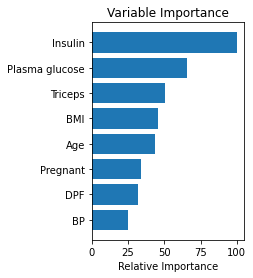

In [45]:
feature_cols = data.columns.drop('Class Variable')
target = ["Class Variable"]
#model = RandomForestRegressor(n_estimators=100, random_state=0)
#my_pipeline.fit(X_train, y_train)
from sklearn.ensemble import ExtraTreesClassifier
array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
#print(model.feature_importances_,feature_cols)
feature_importance =model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


Here we can see that the most important features are Insulin, GLucose,BP. Here, we are just selecting all the features as we dont have many features

## Model creation

In [46]:
## Train Test Split
from sklearn.model_selection import train_test_split

X = data[feature_cols].values
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
#warnings.filterwarnings('ignore')



In [48]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(max_iter=10000)))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [49]:
def GetScaledModel(nameOfScaler):
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    return pipelines 

In [50]:
def scoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [51]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=10,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [52]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
basedLineScore =scoreDataFrame(names,results)


LR: 0.789940 (0.029742)
LDA: 0.781274 (0.024597)
KNN: 0.838606 (0.020388)
CART: 0.826372 (0.044399)
NB: 0.774288 (0.030736)
SVM: 0.835037 (0.029258)
AB: 0.869865 (0.030694)
GBM: 0.890675 (0.022768)
RF: 0.881994 (0.016600)
ET: 0.871589 (0.025632)


In [53]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
scaledScoreStandard =scoreDataFrame(names,results)

standardLR: 0.784723 (0.026015)
standardLDA: 0.781274 (0.024597)
standardKNN: 0.815982 (0.012616)
standardCART: 0.819460 (0.036969)
standardNB: 0.774288 (0.030736)
standardSVM: 0.833328 (0.003662)
standardAB: 0.869865 (0.030694)
standardGBM: 0.888936 (0.019803)
standardRF: 0.878501 (0.015292)
standardET: 0.859400 (0.011177)


In [54]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)

minmaxLR: 0.786447 (0.023165)
minmaxLDA: 0.781274 (0.024597)
minmaxKNN: 0.774378 (0.028941)
minmaxCART: 0.819415 (0.036772)
minmaxNB: 0.774288 (0.030736)
minmaxSVM: 0.808996 (0.014917)
minmaxAB: 0.869865 (0.030694)
minmaxGBM: 0.890675 (0.022768)
minmaxRF: 0.880210 (0.020118)
minmaxET: 0.868111 (0.023838)


In [55]:
scaledScoreMinMax = scoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

,Model,Score,Model,Score,Model,Score
0,LR,0.7899,standardLR,0.7847,minmaxLR,0.7864
1,LDA,0.7813,standardLDA,0.7813,minmaxLDA,0.7813
2,KNN,0.8386,standardKNN,0.8160,minmaxKNN,0.7744
3,CART,0.8264,standardCART,0.8195,minmaxCART,0.8194
4,NB,0.7743,standardNB,0.7743,minmaxNB,0.7743
5,SVM,0.8350,standardSVM,0.8333,minmaxSVM,0.8090
6,AB,0.8699,standardAB,0.8699,minmaxAB,0.8699
7,GBM,0.8907,standardGBM,0.8889,minmaxGBM,0.8907
8,RF,0.8820,standardRF,0.8785,minmaxRF,0.8802
9,ET,0.8716,standardET,0.8594,minmaxET,0.8681


In [56]:
#Using GradientBoosting
gb_model = GradientBoostingClassifier(random_state=10)
print("cross_val_score : ", cross_val_score(gb_model, X, y, cv = 10).mean())
gb_model.fit(X_train,y_train)
y_pred_gb_model=gb_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_gb_model)))

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,9))
gb_params = {"learning_rate":learning_rates,
             "n_estimators":n_estimators,
             "max_depth":max_depths,
             "min_samples_split":min_samples_splits,
             "min_samples_leaf":min_samples_leafs,
             "max_features":max_features           
            }


cross_val_score :  0.9010765550239235
Accuracy Score 0.890625


In [57]:
gb_model = GradientBoostingClassifier(random_state=10)
rs_GB = RandomizedSearchCV(estimator=gb_model, 
                           param_distributions=gb_params, 
                           cv = 10, verbose=2, 
                           random_state=42, n_jobs=-1, 
                           return_train_score=True).fit(X, y)
rs_GB.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    6.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished


{'n_estimators': 200,
 'min_samples_split': 0.1,
 'min_samples_leaf': 0.1,
 'max_features': 8,
 'max_depth': 2.0,
 'learning_rate': 0.5}

In [58]:
gb_tuned= GradientBoostingClassifier(**rs_GB.best_params_)
print("cross_val_score : ", cross_val_score(gb_tuned, X, y, cv = 10).mean())
gb_tuned.fit(X_train,y_train)
y_pred_gb_tuned=gb_tuned.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_gb_tuned)))
#classification report 
print("Classification report:\n{}".format(classification_report(y_test,y_pred_gb_tuned)))

cross_val_score :  0.8893711551606289
Accuracy Score 0.875
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       121
           1       0.81      0.87      0.84        71

    accuracy                           0.88       192
   macro avg       0.86      0.87      0.87       192
weighted avg       0.88      0.88      0.88       192



In [59]:
#Using Random Forest
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [60]:
rf_model = RandomForestClassifier(random_state = 12345)
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)
gs_cv.best_params_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 10.4min finished


{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 500}

In [79]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
print("cross_val_score : ", cross_val_score(rf_tuned, X, y, cv = 10).mean())

cross_val_score :  0.8919856459330143


In [80]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=10,
                       n_estimators=500)

In [82]:
#prediction part
y_pred=rf_tuned.predict(X_test)
#printing confusion matrix
print(confusion_matrix(y_test,y_pred))
#printing accuracy score
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
#classification report 
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))


[[107  14]
 [ 11  60]]
Accuracy Score 0.8697916666666666
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       121
           1       0.81      0.85      0.83        71

    accuracy                           0.87       192
   macro avg       0.86      0.86      0.86       192
weighted avg       0.87      0.87      0.87       192



In [87]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix :')
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix) 

Confusion Matrix :
[[107  14]
 [ 11  60]]


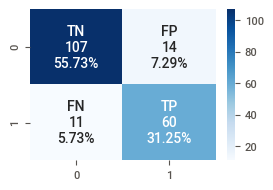

In [88]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(3,2))  
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [89]:
#To dump our model into a flat file
# open a file, where you ant to store the data
import pickle
file = open('RF_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_tuned, file)

In [67]:
#data.to_csv("data_f.csv")

### Miscellaneous - Exploring some additional techniques

In [68]:
import ppscore as pps
mat = pps.matrix(data)
mat.loc[mat['y']=='Class Variable']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
8,Pregnant,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.422118,DecisionTreeRegressor()
17,Plasma glucose,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.350630,DecisionTreeRegressor()
26,BP,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.425111,DecisionTreeRegressor()
35,Triceps,Class Variable,0.087250,regression,True,mean absolute error,0.348958,0.318512,DecisionTreeRegressor()
44,Insulin,Class Variable,0.466313,regression,True,mean absolute error,0.348958,0.186235,DecisionTreeRegressor()
53,BMI,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.404708,DecisionTreeRegressor()
62,DPF,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.442904,DecisionTreeRegressor()
71,Age,Class Variable,0.000000,regression,True,mean absolute error,0.348958,0.403816,DecisionTreeRegressor()
80,Class Variable,Class Variable,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [69]:
import sweetviz as sv

my_report = sv.analyze(data)
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [70]:
#doing non-parametric hypo testing

from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(df_diabetic['BMI'],df_non_diabetic['BMI'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('BMI of diabetic and non-diabetic patients are same (fail to reject H0)')
else:
	print('There is difference in the BMI of diabetic and non-diabetic patients (reject H0)')

Statistics=41707.000, p=0.000
There is difference in the BMI of diabetic and non-diabetic patients (reject H0)


In [71]:
#doing non-parametric hypo testing

from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(df_diabetic['Plasma glucose'],df_non_diabetic['Plasma glucose'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Glucose of diabetic and non-diabetic patients are same (fail to reject H0)')
else:
	print('There is difference in the Glucose of diabetic and non-diabetic patients (reject H0)')

Statistics=27627.500, p=0.000
There is difference in the Glucose of diabetic and non-diabetic patients (reject H0)


In [72]:
#Trying to create a model using lightgbm
import lightgbm as lgb

valid_fraction = 0.1
valid_size = int(len(data) * valid_fraction)
train = data[:-2 * valid_size]
valid = data[-2 * valid_size:-valid_size]
test = data[-valid_size:]
dtrain = lgb.Dataset(train[feature_cols], label=train['Class Variable'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['Class Variable'])

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['Class Variable'], ypred)

print(f"Test AUC score: {score}")


Test AUC score: 0.966304347826087


In [73]:
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif
baseline_data = data.copy()
feature_cols = baseline_data.columns.drop('Class Variable')

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(baseline_data[feature_cols], baseline_data['Class Variable'])
X_new

array([[148.        ,  35.        , 206.84615385,  33.6       ,
         50.        ],
       [ 85.        ,  29.        , 130.28787879,  26.6       ,
         31.        ],
       [183.        ,  33.        , 206.84615385,  23.3       ,
         32.        ],
       ...,
       [121.        ,  23.        , 112.        ,  26.2       ,
         30.        ],
       [126.        ,  33.        , 206.84615385,  30.1       ,
         47.        ],
       [ 93.        ,  31.        , 130.28787879,  30.4       ,
         23.        ]])

In [75]:
feature_cols = baseline_data.columns.drop('Class Variable')
train, valid, _ = get_data_splits(baseline_data)

# Keep 5 features
selector = SelectKBest(f_classif, k=3)

X_new = selector.fit_transform(train[feature_cols], train['Class Variable'])
X_new


array([[148.        , 206.84615385,  33.6       ],
       [ 85.        , 130.28787879,  26.6       ],
       [183.        , 206.84615385,  23.3       ],
       ...,
       [105.        , 130.28787879,  32.5       ],
       [138.        , 144.        ,  36.1       ],
       [106.        , 130.28787879,  25.8       ]])

In [76]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,Pregnant,Plasma glucose,BP,Triceps,Insulin,BMI,DPF,Age
0,0.0,148.0,0.0,0.0,206.846154,33.6,0.0,0.0
1,0.0,85.0,0.0,0.0,130.287879,26.6,0.0,0.0
2,0.0,183.0,0.0,0.0,206.846154,23.3,0.0,0.0
3,0.0,89.0,0.0,0.0,94.000000,28.1,0.0,0.0
4,0.0,137.0,0.0,0.0,168.000000,43.1,0.0,0.0
